In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀清理後的資料
df = pd.read_csv('../data/processed_app_interactions.csv', parse_dates=['timestamp'])

print("✅ 已載入清理後資料:", df.shape)
df.head()

✅ 已載入清理後資料: (96341, 23)


,timestamp,user_id,session_id,ip_address,device_os,device_os_version,device_model,screen_resolution,location_country,location_city,...,memory_usage_mb,event_type,event_target,event_value,app_version,session_duration_sec,is_subscribed,user_age,phone_number,push_enabled
0,2025-01-13 23:12:43,13457,S-852694,181.246.29.95,Android,9.9,OnePlus 9,1080x1920,Senegal,South Luiston,...,3687.0,double_tap,profile_image,5,2.6.8,3311.0,True,51.0,001-423-901-2346x818,False
1,2024-12-24 22:57:29,95977,S-766538,59.155.205.42,Android,7.9,Samsung Galaxy S22,1080x1920,Greenland,Lake Brandonton,...,3521.0,pinch,search_bar,6,3.3.6,3283.0,False,40.0,(437)544-4735,False
2,2024-12-22 09:00:26,52758,S-228244,183.205.124.1,iOS,15.1,iPhone 13,1080x1920,Falkland Islands (Malvinas),Julieside,...,639.0,zoom,menu_icon,6,5.4.5,2870.0,True,73.0,001-815-298-0574x8189,True
3,2025-01-07 02:53:07,53777,S-633216,179.124.111.38,iOS,16.1,iPhone 14 Pro,720x1280,Comoros,North Steven,...,119.0,long_press,checkout_button,9,4.7.1,332.0,True,47.0,(252)814-8186,False
4,2024-12-22 15:58:18,6302,S-508537,198.184.172.85,Android,7.6,Motorola Edge,1080x1920,Mayotte,Ernestport,...,1789.0,view,settings_button,7,2.0.8,1694.0,True,32.0,+1-778-241-8813,False


In [2]:
# 基本資料檢查

# 欄位型別
print("資料型別：")
print(df.dtypes)

# 缺失值檢查
print("\n缺失值狀況：")
print(df.isnull().sum().sort_values(ascending=False).head(10))

資料型別：
timestamp               datetime64[ns]
user_id                         object
session_id                      object
ip_address                      object
device_os                       object
device_os_version               object
device_model                    object
screen_resolution               object
location_country                object
location_city                   object
app_language                    object
network_type                    object
battery_level                  float64
memory_usage_mb                float64
event_type                      object
event_target                    object
event_value                     object
app_version                     object
session_duration_sec           float64
is_subscribed                     bool
user_age                       float64
phone_number                    object
push_enabled                      bool
dtype: object

缺失值狀況：
timestamp               0
battery_level           0
phone_number           

In [3]:
# 數值欄位的統計摘要
print("數值欄位統計：")
display(df[['session_duration_sec','memory_usage_mb','user_age','battery_level']].describe())

# 類別欄位：各取前 5 名
cat_cols = ['device_os','device_model','event_type','location_country','app_language']

print("\n類別欄位分布（前 5 名）：")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head(5))

數值欄位統計：


,session_duration_sec,memory_usage_mb,user_age,battery_level
count,96341.000000,96341.000000,96341.000000,96341.000000
mean,1807.714940,2073.330046,46.443529,50.242783
std,1037.387814,1172.603741,19.594720,29.082907
min,4.000000,50.000000,10.000000,0.000000
25%,911.000000,1055.000000,29.000000,25.000000
50%,1806.000000,2075.000000,46.000000,50.000000
75%,2707.000000,3088.000000,63.000000,75.000000
max,8614.000000,9727.000000,89.000000,100.000000



類別欄位分布（前 5 名）：

device_os:
device_os
Android    54540
iOS        40857
Unknown      300
iO6            4
Andromd        4
Name: count, dtype: int64

device_model:
device_model
Xiaomi Mi 11             9258
OnePlus 9                9156
Samsung Galaxy Note20    9063
Google Pixel 6           9062
Samsung Galaxy S22       9022
Name: count, dtype: int64

event_type:
event_type
click     9715
share     9709
swipe     9573
scroll    9552
view      9531
Name: count, dtype: int64

location_country:
location_country
Korea      809
Congo      792
Uruguay    436
Jamaica    426
Serbia     425
Name: count, dtype: int64

app_language:
app_language
fr    12174
zh    11996
ja    11988
ru    11896
es    11883
Name: count, dtype: int64


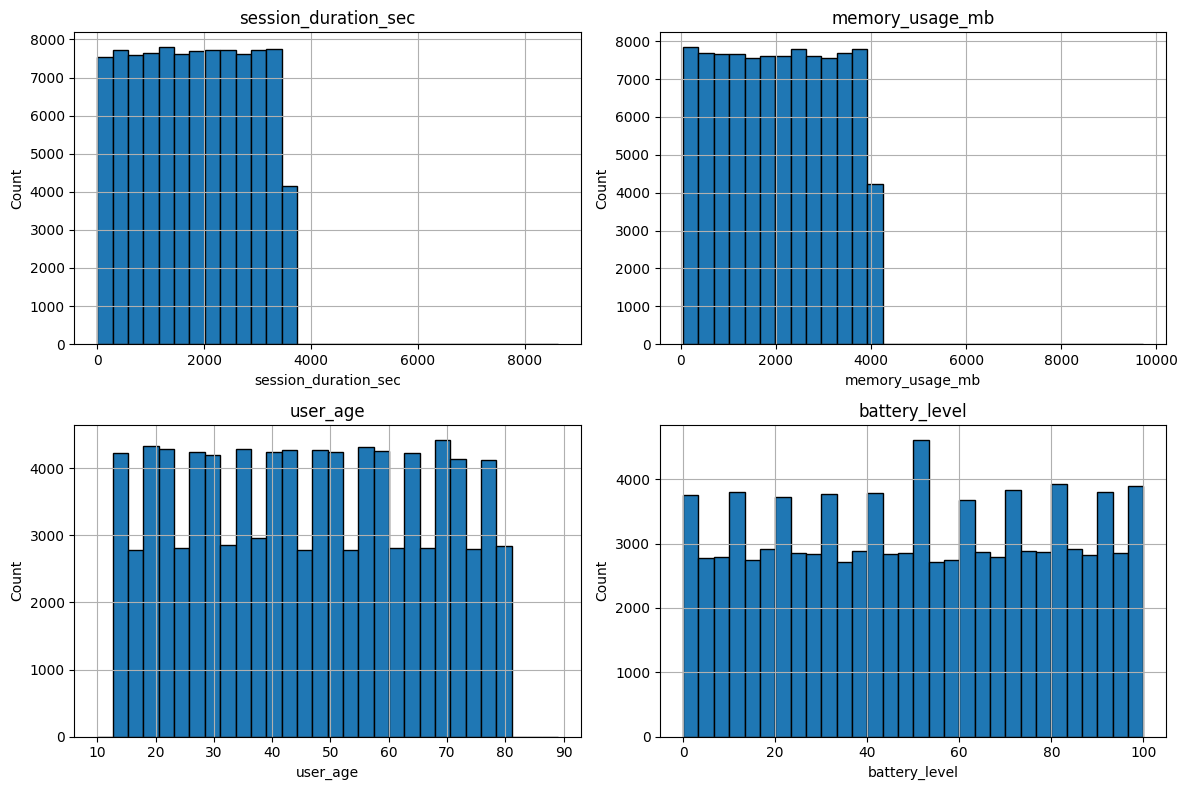

In [4]:
import matplotlib.pyplot as plt

num_cols = ['session_duration_sec','memory_usage_mb','user_age','battery_level']

# 設定圖表大小
plt.figure(figsize=(12,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

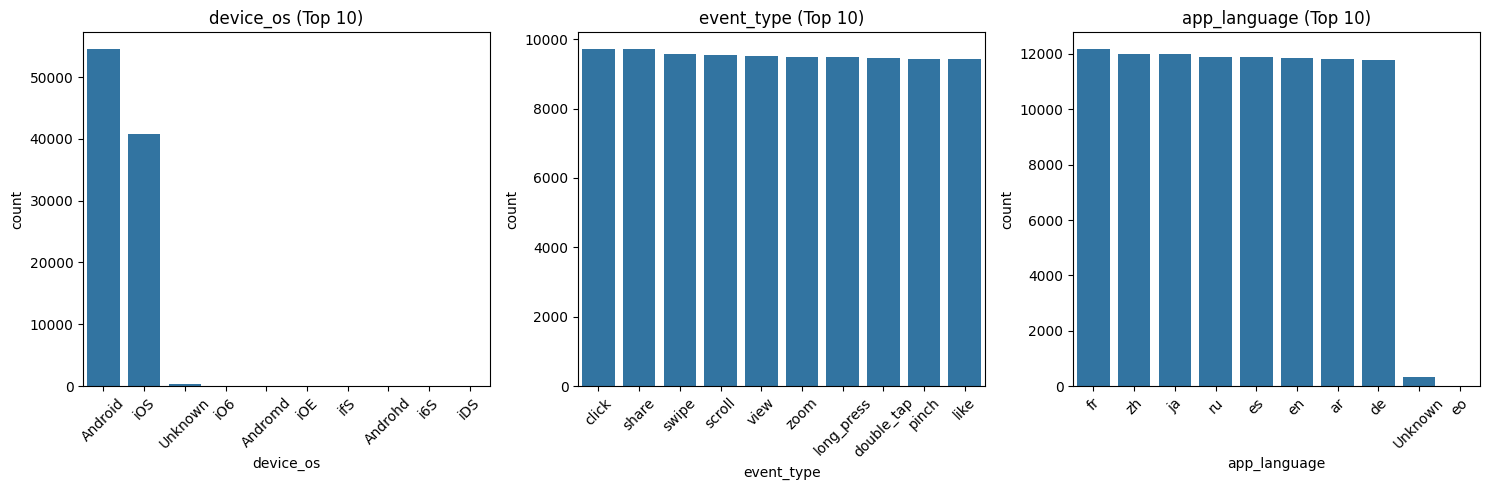

In [5]:
import seaborn as sns

cat_cols = ['device_os','event_type','app_language']

plt.figure(figsize=(15,5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"{col} (Top 10)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [6]:
df['device_os'].unique()

array(['Android', 'iOS', 'sA7A8f', 'Dndroid', 'pj3WX8', 'Unknown',
       'tndroid', 'iOB', 'iXS', 'rOS', 'iO3', 'AndOoid', 'RXK2ma', 'jOS',
       'iO1', 'MninjQ', 'pxQKyy', 'Andrmid', 'swrbso', 'dzygXT', 'iiS',
       'Ikhu6f', 'XjlwrY', 'Kndroid', 'DW05zD', 'wndroid', '2Yw1Ji',
       'AndroiV', 'iOR', '2ndroid', 'iMS', 'oOS', '47XJxC', 'Antroid',
       'AOS', '6WFhU4', 'EkHatO', 'AdFmFk', 'E7gMku', '5ndroid', '6HEi7k',
       'SYaq84', '89Cl0k', 'cndroid', '2e1pIX', 'mIkhLA', 'iOT', 'zCz9QP',
       '9y3210', '2s3XQg', 'JPrPRK', 'Andr1id', 'Andreid', 'vwb65A',
       'Apdroid', 'fmlSbm', 'cNGJNS', 'iBS', 'o9jIWG', 'ozOISO',
       'AndroFd', 'AndroCd', 'Aqdroid', 'iYS', 'knEwsF', 'iAS', 'I9zO7f',
       'qkRLxV', 'G5sB1W', 'iOl', 'Addroid', 'igS', 'sndroid', 'tOS',
       '5wdg3V', '2fhfQr', 'i6S', 'Andqoid', 'BydZ4f', 'vC9A8v',
       'AnUroid', 'HOTpSt', 'SyRVij', 'S46ifk', 'WwzTOa', 'Indroid',
       'ivS', 'hIEhD6', 'iOD', '97z8lX', 'EOS', 'wD0Fcc', '3ueJXs',
       'AIdroid',

In [7]:
# 修正 device_os 欄位：把明顯的錯字歸類成 Android / iOS，其餘設為 Unknown

def clean_device_os(os_value):
    if pd.isna(os_value):
        return "Unknown"
    val = str(os_value).strip().lower()  # 統一小寫、去掉空白
    
    # Android 的常見錯字/變形
    if "android" in val or "and" in val:
        return "Android"
    
    # iOS 的常見錯字/變形
    if "ios" in val or val.startswith("iO".lower()) or val.startswith("i"):
        return "iOS"
    
    return "Unknown"

df['device_os_clean'] = df['device_os'].apply(clean_device_os)

print(df['device_os_clean'].value_counts())

device_os_clean
Android    54627
iOS        40978
Unknown      736
Name: count, dtype: int64


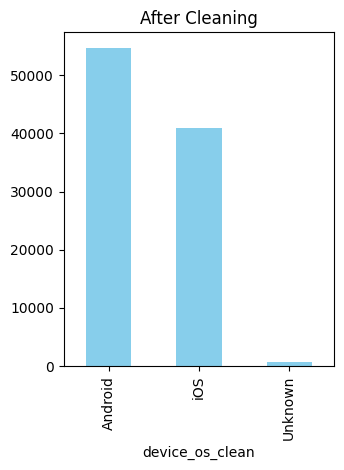

In [8]:
# 修正 device_os 欄位
def clean_device_os(os_value):
    if pd.isna(os_value):
        return "Unknown"
    val = str(os_value).strip().lower()

# 修正後
plt.subplot(1,2,2)
df['device_os_clean'].value_counts().plot(kind='bar', color='skyblue')
plt.title("After Cleaning")

plt.tight_layout()
plt.show()

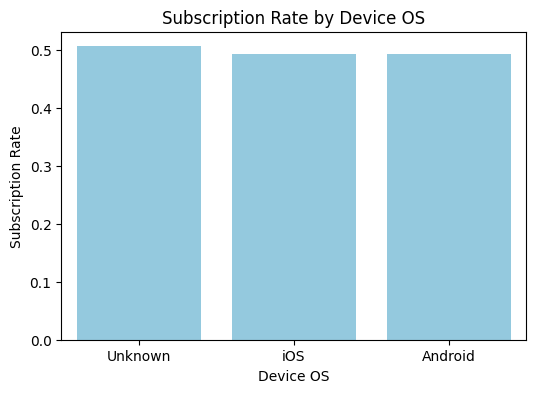

In [9]:
# 計算各 OS 的訂閱率
os_conv = df.groupby("device_os_clean")["is_subscribed"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=os_conv.index, y=os_conv.values, color="skyblue")
plt.title("Subscription Rate by Device OS")
plt.ylabel("Subscription Rate")
plt.xlabel("Device OS")
plt.show()

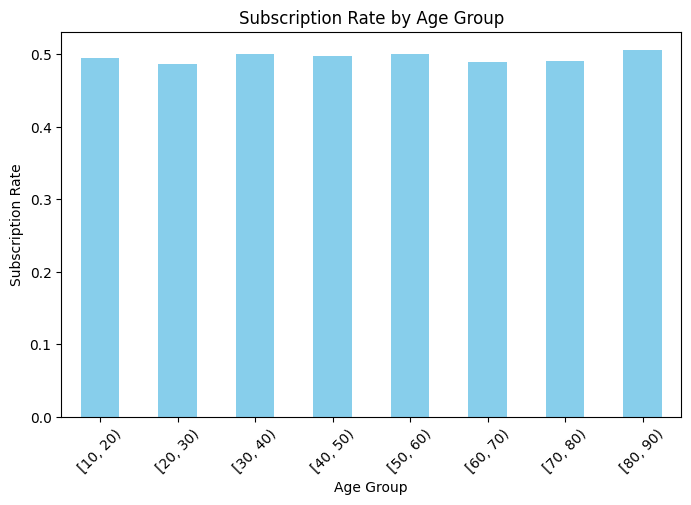

In [10]:
# 年齡分區（10 歲一組）
df['age_group'] = pd.cut(df['user_age'], bins=[10,20,30,40,50,60,70,80,90], right=False)

# 各年齡段訂閱率
age_group_subscription = df.groupby('age_group', observed=True)['is_subscribed'].mean()

plt.figure(figsize=(8,5))
age_group_subscription.plot(kind='bar', color='skyblue')
plt.title("Subscription Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)
plt.show()

User count by age group:


,count
age_group,
"[10, 20)",9860
"[20, 30)",14234
"[30, 40)",14297
"[40, 50)",14169
"[50, 60)",14166
"[60, 70)",14238
"[70, 80)",13950
"[80, 90)",1427


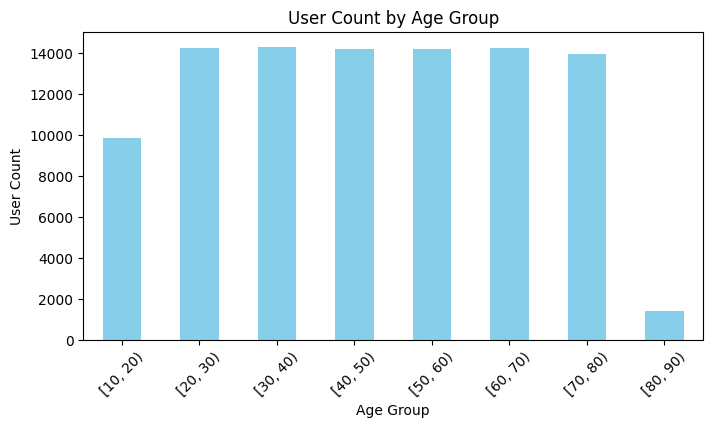

In [11]:
# 確保 age_group 已經有建好
if 'age_group' not in df.columns:
    df['user_age'] = pd.to_numeric(df['user_age'], errors='coerce')
    df['age_group'] = pd.cut(
        df['user_age'],
        bins=[10,20,30,40,50,60,70,80,90],
        right=False
    )

# 統計各年齡區間的人數
age_counts = df['age_group'].value_counts().sort_index()

# 印出表格
print("User count by age group:")
display(age_counts.to_frame('count'))

# 繪圖
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
age_counts.plot(kind='bar', color='skyblue')
plt.title("User Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()

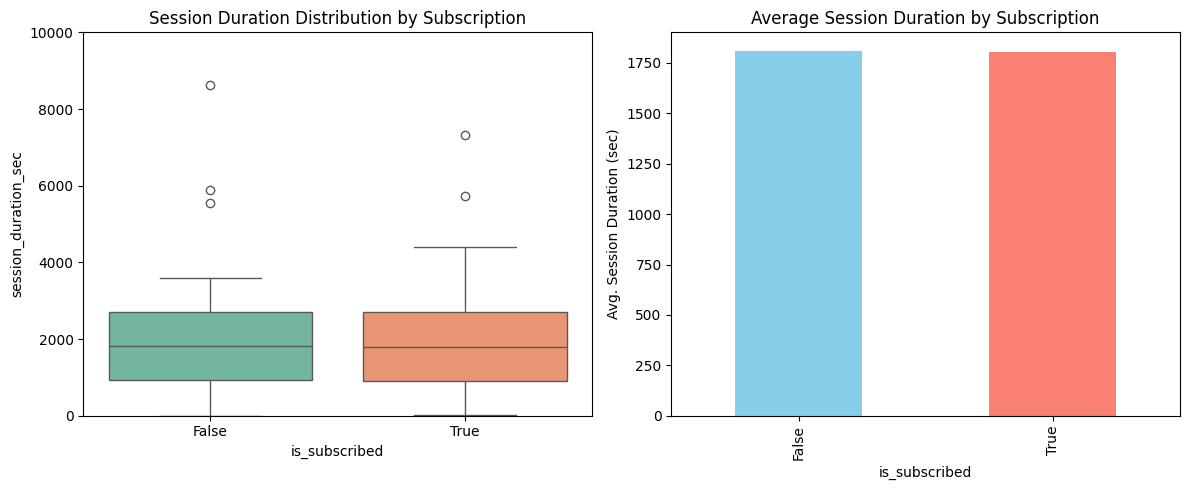

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立圖表區域
plt.figure(figsize=(12,5))

# 1️⃣ 箱型圖 (Boxplot) - 看分布
plt.subplot(1,2,1)
sns.boxplot(
    x='is_subscribed', 
    y='session_duration_sec', 
    hue='is_subscribed',  # 用 hue 來套顏色
    data=df, 
    palette='Set2',
    legend=False
)
plt.ylim(0, 10000)  # 避免極端值影響，視情況可調整
plt.title("Session Duration Distribution by Subscription")

# 2️⃣ 平均值 Barplot - 看誰平均高
plt.subplot(1,2,2)
df.groupby('is_subscribed')['session_duration_sec'].mean().plot(
    kind='bar', color=['skyblue','salmon']
)
plt.title("Average Session Duration by Subscription")
plt.ylabel("Avg. Session Duration (sec)")

plt.tight_layout()
plt.show()

,subscription_rate,count
event_type,,
liwe,1.000000,2
share,0.504995,9709
zooL,0.500000,2
zooX,0.500000,2
view,0.498793,9531
scroll,0.497069,9552
pinch,0.495762,9438
zoom,0.493103,9497
double_tap,0.492760,9461


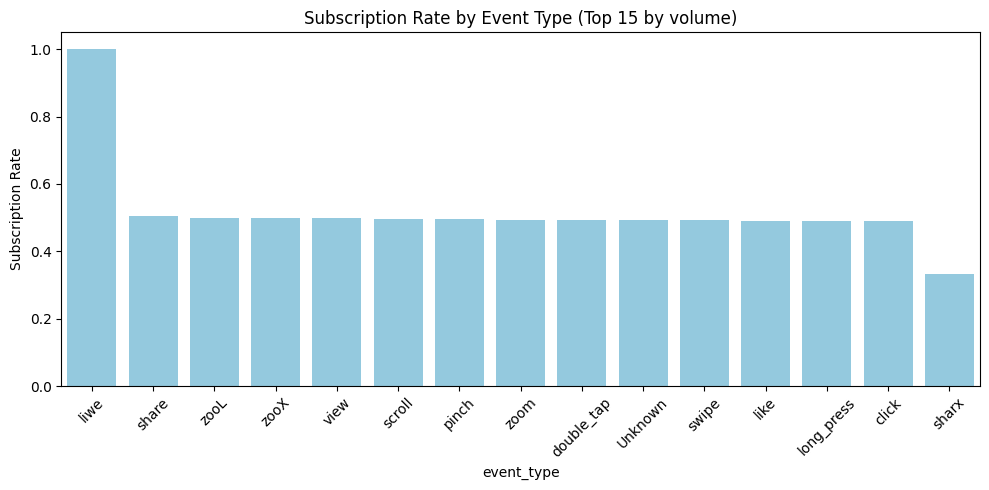

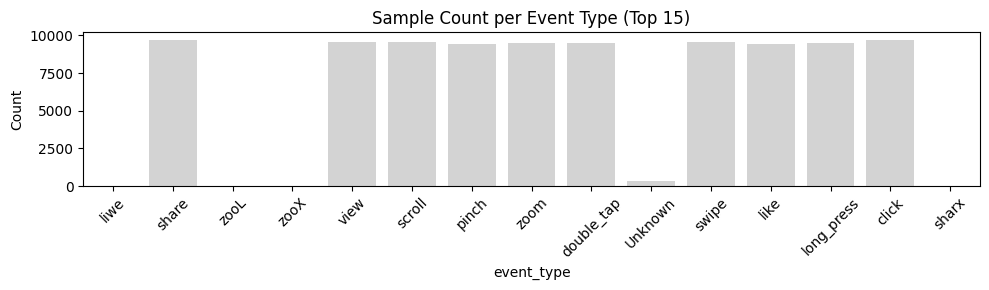

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 取出出現次數最多的前 N 種事件，避免長尾雜訊
TOP_N = 15
top_events = df['event_type'].value_counts().head(TOP_N).index

# 只保留前 N 種事件
df_ev = df[df['event_type'].isin(top_events)].copy()

# 計算各事件的訂閱率與樣本數
ev_rate = (
    df_ev.groupby('event_type')['is_subscribed']
         .agg(['mean','count'])
         .sort_values('mean', ascending=False)
         .rename(columns={'mean':'subscription_rate'})
)

display(ev_rate)  # 表格也看一下

# 視覺化（訂閱率）
plt.figure(figsize=(10,5))
sns.barplot(
    x=ev_rate.index, 
    y=ev_rate['subscription_rate'], 
    color='skyblue'
)
plt.title('Subscription Rate by Event Type (Top 15 by volume)')
plt.xlabel('event_type')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 視覺化（樣本數，輔助判讀可靠度）
plt.figure(figsize=(10,3))
sns.barplot(
    x=ev_rate.index, 
    y=ev_rate['count'], 
    color='lightgray'
)
plt.title('Sample Count per Event Type (Top 15)')
plt.xlabel('event_type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

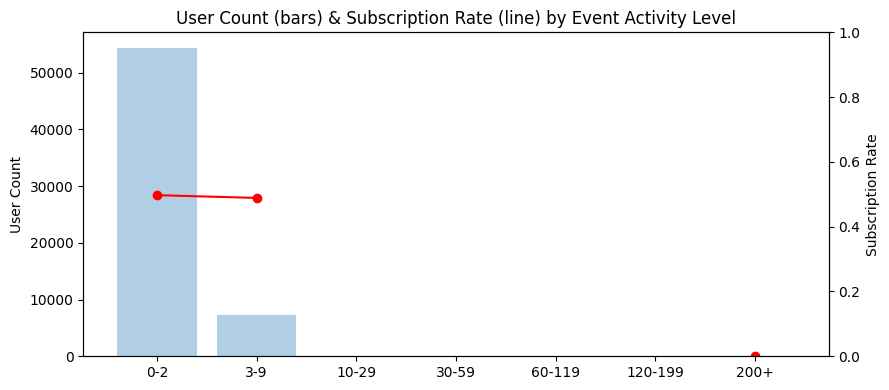

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) 建立 df_user_events（每個 user 的事件數）
df_user_events = (
    df.groupby('user_id')
      .size()
      .reset_index(name='event_count')
    .merge(df[['user_id','is_subscribed']], on='user_id', how='left')
    .drop_duplicates('user_id')
)

# --- 2) 設定活動量級區間（依你之前設計的 bins）
bins = [0, 2, 9, 29, 59, 119, 199, 99999]
labels = ['0-2','3-9','10-29','30-59','60-119','120-199','200+']
df_user_events['event_count_bin'] = pd.cut(df_user_events['event_count'], bins=bins, labels=labels, right=True)

# --- 3) 用戶數統計
cats = df_user_events['event_count_bin'].cat.categories
counts = (
    df_user_events['event_count_bin']
      .value_counts()
      .reindex(cats, fill_value=0)
)

# --- 4) 訂閱率
subscription_by_activity = (
    df_user_events.groupby('event_count_bin', observed=False)['is_subscribed']
      .mean()
      .reindex(cats)
)


# --- 5) 繪圖
fig, ax1 = plt.subplots(figsize=(9,4))

ax1.bar(counts.index.astype(str), counts.values, alpha=0.35, label="User Count")
ax1.set_ylabel("User Count")

ax2 = ax1.twinx()
ax2.plot(subscription_by_activity.index.astype(str),
         subscription_by_activity.values,
         marker='o', color='red', label="Subscription Rate")
ax2.set_ylabel("Subscription Rate")
ax2.set_ylim(0,1)

plt.title("User Count (bars) & Subscription Rate (line) by Event Activity Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
# 找出最早和最晚的時間
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

print("資料時間區間：", start_time, " ~ ", end_time)

資料時間區間： 2024-01-13 10:15:01  ~  2125-01-07 22:43:37


In [16]:
df['year'] = df['timestamp'].dt.year
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

year
2024    49406
2025    46930
2034        1
2044        1
2054        1
2084        1
2125        1
Name: count, dtype: int64


In [17]:
df = df[df['timestamp'] <= "2025-12-31"]
print(df['year'].value_counts().sort_index())

# 找出最早和最晚的時間
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

print("資料時間區間：", start_time, " ~ ", end_time)

year
2024    49406
2025    46930
Name: count, dtype: int64
資料時間區間： 2024-01-13 10:15:01  ~  2025-01-15 13:40:21


In [18]:
# 每個 user 的事件數
df_user_events = df.groupby('user_id').size().reset_index(name='event_count')

# 描述統計
print(df_user_events['event_count'].describe())


count    61715.000000
mean         1.560982
std          1.519303
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        323.000000
Name: event_count, dtype: float64


In [19]:
bins = [0, 1, 5, 10, 20, 50, 100, df_user_events['event_count'].max()]
labels = ['1次', '2-5次', '6-10次', '11-20次', '21-50次', '51-100次', '100+']

df_user_events['event_bin'] = pd.cut(df_user_events['event_count'], bins=bins, labels=labels, right=True)
summary = df_user_events['event_bin'].value_counts().sort_index()

print(summary)


event_bin
1次         36827
2-5次       24845
6-10次         42
11-20次         0
21-50次         0
51-100次        0
100+           1
Name: count, dtype: int64


In [20]:
# 1. 每個 user 的事件數
df_user_events = df.groupby('user_id').size().reset_index(name='event_count')

# 2. 每個 user 的訂閱狀態 (假設一個 user 只有一個 is_subscribed 值)
user_subscription = df[['user_id', 'is_subscribed']].drop_duplicates()

# 3. 合併
df_user_events = df_user_events.merge(user_subscription, on='user_id', how='left')

# 4. 分箱
bins = [0, 3, 10, 30, 60, 120, 200, df_user_events['event_count'].max() + 1]
labels = ['0-2','3-9','10-29','30-59','60-119','120-199','200+']

df_user_events['event_count_bin'] = pd.cut(
    df_user_events['event_count'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# 5. 各活動量級的訂閱率
subscription_by_activity = (
    df_user_events.groupby('event_count_bin', observed=True)['is_subscribed']
    .mean()
    .reindex(labels)
)

# 6. 各活動量級的人數
counts = df_user_events['event_count_bin'].value_counts().reindex(labels)

# 7. 統計表
subscription_summary = pd.DataFrame({
    "User Count": counts,
    "Subscription Rate": subscription_by_activity
})

print(subscription_summary)

                 User Count  Subscription Rate
event_count_bin                               
0-2                   63066           0.498113
3-9                   12963           0.494099
10-29                     0                NaN
30-59                     0                NaN
60-119                    0                NaN
120-199                   0                NaN
200+                      2           0.500000


In [21]:
event_type_counts = df['event_type'].value_counts()
print(event_type_counts)

event_type
click     9714
share     9709
swipe     9573
scroll    9552
view      9531
          ... 
iLvDfu       1
swioe        1
shZre        1
vi3w         1
shar4        1
Name: count, Length: 622, dtype: int64


In [22]:
top_events = df['event_type'].value_counts().head(20)
print(top_events)

event_type
click         9714
share         9709
swipe         9573
scroll        9552
view          9531
zoom          9496
long_press    9488
double_tap    9461
pinch         9437
like          9419
Unknown        333
sharx            3
zooX             2
zooL             2
liwe             2
lice             2
8hare            2
shyre            2
zkom             2
swUpe            2
Name: count, dtype: int64


In [23]:
valid_events = df['event_type'].value_counts()
valid_events = valid_events[valid_events >= 50].index
df_clean = df[df['event_type'].isin(valid_events)]


In [24]:
event_type_counts = df_clean['event_type'].value_counts()
event_type_percent = df_clean['event_type'].value_counts(normalize=True) * 100
event_summary = pd.DataFrame({
    "Count": event_type_counts,
    "Percent": event_type_percent.round(2)
})
print(event_summary)


            Count  Percent
event_type                
click        9714    10.15
share        9709    10.14
swipe        9573    10.00
scroll       9552     9.98
view         9531     9.96
zoom         9496     9.92
long_press   9488     9.91
double_tap   9461     9.88
pinch        9437     9.86
like         9419     9.84
Unknown       333     0.35


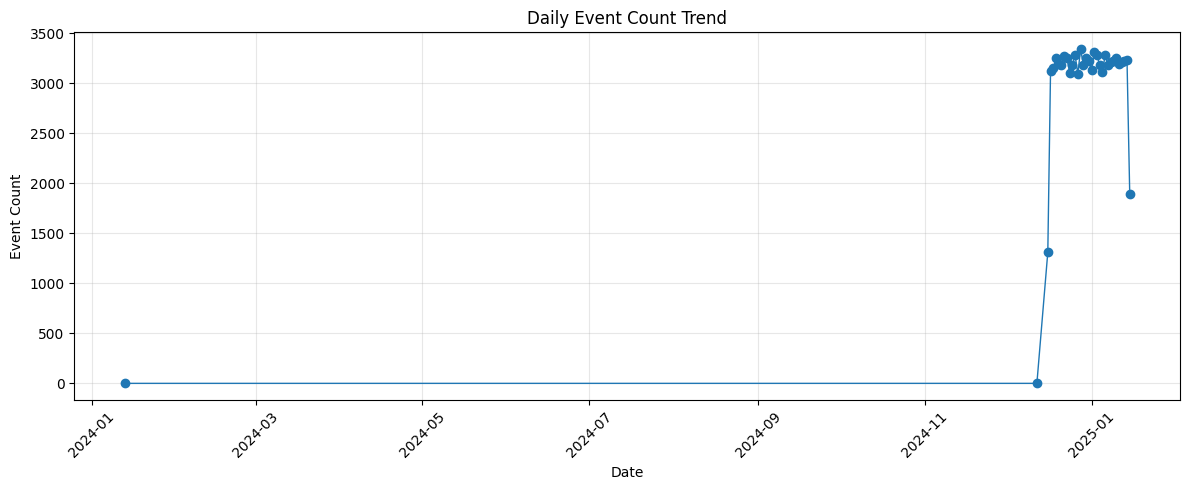

In [25]:
import matplotlib.pyplot as plt

# 確保 timestamp 是 datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 按天統計事件數
daily_events = df.groupby(df['timestamp'].dt.date).size()

# 畫折線圖
plt.figure(figsize=(12,5))
plt.plot(daily_events.index, daily_events.values, marker='o', linewidth=1)
plt.title("Daily Event Count Trend")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
df['date'] = df['timestamp'].dt.date
print(df['date'].value_counts().sort_index().head(50))  # 前 50 天


date
2024-01-13       1
2024-12-12       1
2024-12-16    1312
2024-12-17    3123
2024-12-18    3151
2024-12-19    3251
2024-12-20    3191
2024-12-21    3183
2024-12-22    3269
2024-12-23    3251
2024-12-24    3107
2024-12-25    3186
2024-12-26    3280
2024-12-27    3094
2024-12-28    3343
2024-12-29    3188
2024-12-30    3253
2024-12-31    3222
2025-01-01    3132
2025-01-02    3311
2025-01-03    3284
2025-01-04    3181
2025-01-05    3114
2025-01-06    3286
2025-01-07    3181
2025-01-08    3210
2025-01-09    3221
2025-01-10    3255
2025-01-11    3195
2025-01-12    3213
2025-01-13    3228
2025-01-14    3230
2025-01-15    1889
Name: count, dtype: int64


In [27]:
daily_users = df.groupby(df['timestamp'].dt.date)['user_id'].nunique()
print(daily_users.head(50))


timestamp
2024-01-13       1
2024-12-12       1
2024-12-16    1303
2024-12-17    3072
2024-12-18    3088
2024-12-19    3204
2024-12-20    3134
2024-12-21    3126
2024-12-22    3196
2024-12-23    3189
2024-12-24    3057
2024-12-25    3111
2024-12-26    3215
2024-12-27    3036
2024-12-28    3275
2024-12-29    3125
2024-12-30    3186
2024-12-31    3168
2025-01-01    3075
2025-01-02    3242
2025-01-03    3222
2025-01-04    3133
2025-01-05    3071
2025-01-06    3207
2025-01-07    3123
2025-01-08    3162
2025-01-09    3161
2025-01-10    3185
2025-01-11    3134
2025-01-12    3156
2025-01-13    3167
2025-01-14    3170
2025-01-15    1871
Name: user_id, dtype: int64


            Weekly Events  Weekly Active Users
timestamp                                     
2024-12-01              0                    0
2024-12-08              0                    0
2024-12-15              1                    1
2024-12-22          20480                18424
2024-12-29          22449                19994
2025-01-05          22497                20153
2025-01-12          22561                20126
2025-01-19           8347                 7995


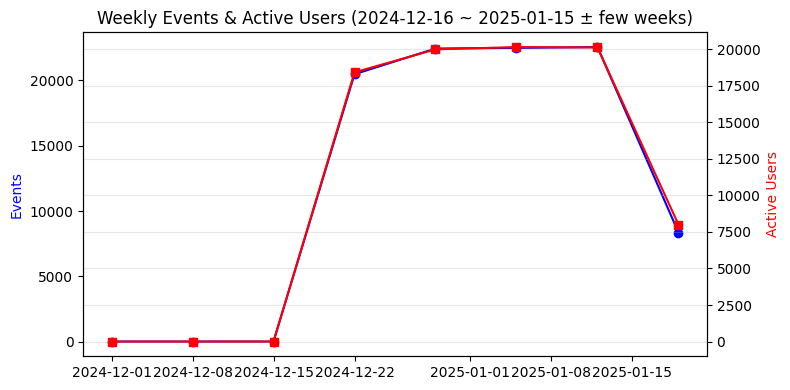

In [28]:
# 確保 timestamp 是 datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 每週事件數
weekly_events = df.resample('W', on='timestamp').size()

# 每週活躍用戶數
weekly_users = df.resample('W', on='timestamp')['user_id'].nunique()

# 合併
weekly_summary = pd.DataFrame({
    'Weekly Events': weekly_events,
    'Weekly Active Users': weekly_users
})

# 篩選 2024-12-01 ~ 2025-01-31 的區間
weekly_focus = weekly_summary.loc["2024-12-01":"2025-01-31"]

print(weekly_focus)

# 視覺化
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(weekly_focus.index, weekly_focus['Weekly Events'], marker='o', label="Events", color="blue")
ax1.set_ylabel("Events", color="blue")

ax2 = ax1.twinx()
ax2.plot(weekly_focus.index, weekly_focus['Weekly Active Users'], marker='s', label="Active Users", color="red")
ax2.set_ylabel("Active Users", color="red")

plt.title("Weekly Events & Active Users (2024-12-16 ~ 2025-01-15 ± few weeks)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [29]:
import pandas as pd

# 確保 timestamp 是 datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date
df['weekday'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['weekday'].isin([5,6]) # Sat/Sun

# --- 每日事件數 ---
daily_events = df.groupby(['date','is_weekend']).size().reset_index(name='events')

# --- 每日活躍用戶數 ---
daily_users = df.groupby(['date','is_weekend'])['user_id'].nunique().reset_index(name='active_users')

# 合併
daily_summary = pd.merge(daily_events, daily_users, on=['date','is_weekend'])

# 平均值比較
weekend_vs_weekday = daily_summary.groupby('is_weekend')[['events','active_users']].mean().round(0)
weekend_vs_weekday.index = ['Weekday','Weekend']

print(weekend_vs_weekday)


         events  active_users
Weekday  2944.0        2890.0
Weekend  2854.0        2802.0


In [30]:
import pandas as pd

# 0) 保護原 df
df = df.copy()

# 1) 時間轉換與標準化到「日」
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.normalize()   # 等於取日期但仍是 datetime64[ns]

# 2) 為每個 user 算首日（cohort）
cohort_map = (
    df.groupby('user_id')['date']
      .min()                      # 每位用戶的最早日期
)

# 3) 用 map 對齊，不會產生重複欄位
df['cohort_date'] = df['user_id'].map(cohort_map)

# 4) 距離首日的天數
df['days_since_first'] = (df['date'] - df['cohort_date']).dt.days

# 5) 留存矩陣（每格 = 當天不重複用戶數）
retention = df.pivot_table(
    index='cohort_date',
    columns='days_since_first',
    values='user_id',
    aggfunc=pd.Series.nunique
).sort_index().sort_index(axis=1)

# 6) Cohort 規模用「第0天」計算
cohort_sizes = (
    df.loc[df['days_since_first'] == 0]
      .groupby('cohort_date')['user_id']
      .nunique()
)

# 7) 留存率
retention_rate = retention.div(cohort_sizes, axis=0).round(3)

print(retention_rate.head(10))


days_since_first   0      1      2      3      4      5      6      7      8   \
cohort_date                                                                     
2024-01-13        1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-12-12        1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.000   
2024-12-16        1.0  0.028  0.031  0.032  0.033  0.038  0.026  0.029  0.029   
2024-12-17        1.0  0.025  0.034  0.031  0.029  0.031  0.039  0.033  0.030   
2024-12-18        1.0  0.037  0.031  0.037  0.036  0.035  0.032  0.029  0.032   
2024-12-19        1.0  0.036  0.035  0.028  0.031  0.031  0.026  0.034  0.027   
2024-12-20        1.0  0.035  0.034  0.029  0.040  0.028  0.033  0.024  0.031   
2024-12-21        1.0  0.035  0.025  0.029  0.034  0.030  0.029  0.034  0.029   
2024-12-22        1.0  0.036  0.038  0.037  0.031  0.030  0.032  0.033  0.030   
2024-12-23        1.0  0.039  0.034  0.033  0.033  0.031  0.032  0.036  0.035   

days_since_first     9   ..

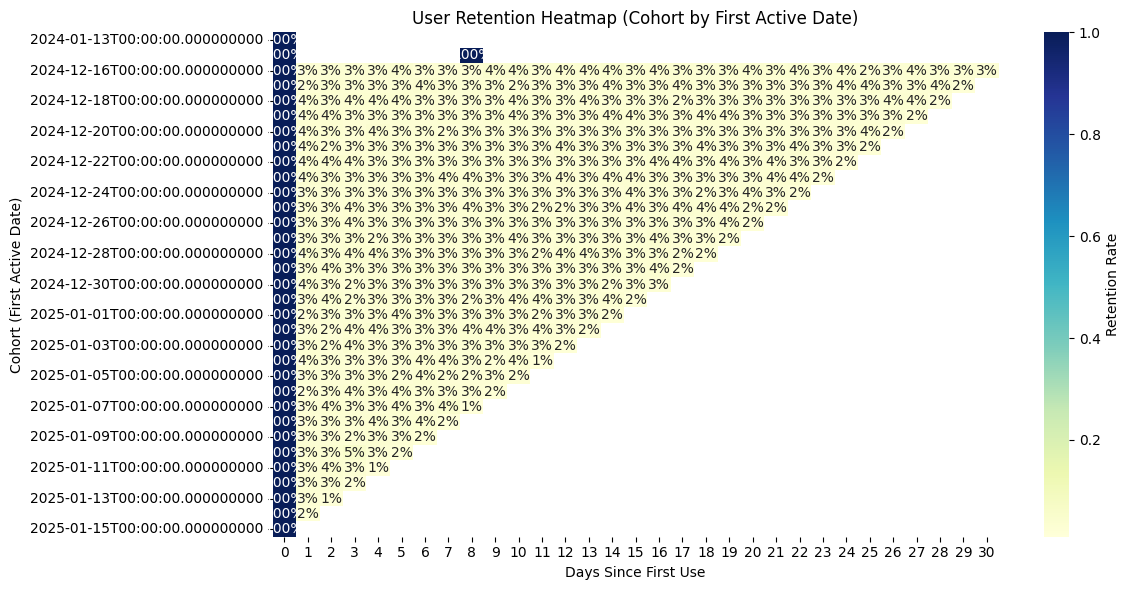

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有 retention_rate 這個 DataFrame
# index = cohort_date, columns = days_since_first, values = 留存率 (0~1)

plt.figure(figsize=(12,6))
sns.heatmap(
    retention_rate,
    annot=True,       # 在格子裡顯示數字
    fmt=".0%",        # 百分比格式
    cmap="YlGnBu",    # 顏色主題
    cbar_kws={'label': 'Retention Rate'}
)

plt.title("User Retention Heatmap (Cohort by First Active Date)")
plt.xlabel("Days Since First Use")
plt.ylabel("Cohort (First Active Date)")
plt.tight_layout()
plt.show()


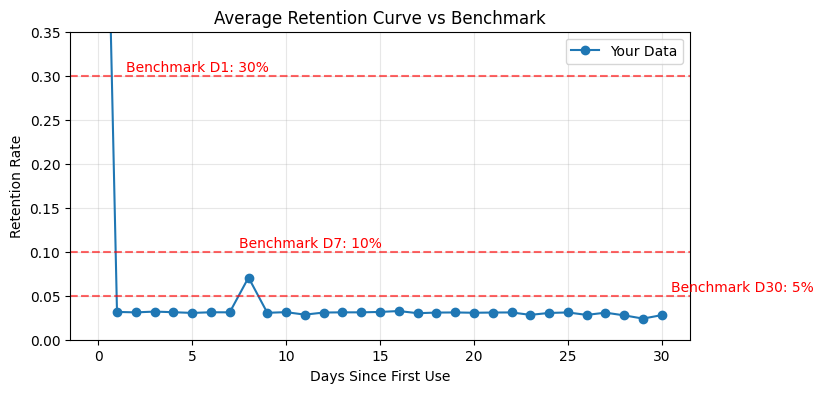

In [32]:
import matplotlib.pyplot as plt

# 假設 retention_rate 已經算好
# 計算每一天的平均留存率 (跨 cohort 取平均)
avg_retention = retention_rate.mean(axis=0)

plt.figure(figsize=(8,4))
plt.plot(avg_retention.index, avg_retention.values, marker='o', label="Your Data")

# --- 加入基準值 ---
benchmark = {1:0.30, 7:0.10, 30:0.05}  # Day1=30%, Day7=10%, Day30=5%
for day, rate in benchmark.items():
    plt.axhline(rate, color='r', linestyle='--', alpha=0.6)
    plt.text(day+0.5, rate+0.005, f"Benchmark D{day}: {int(rate*100)}%", color="red")

plt.title("Average Retention Curve vs Benchmark")
plt.xlabel("Days Since First Use")
plt.ylabel("Retention Rate")
plt.ylim(0, 0.35)  # 放大到 35%，方便觀察
plt.grid(alpha=0.3)
plt.legend()
plt.show()



In [33]:
import pandas as pd

# 0) 不動原始 df（可選）
df = df.copy()

# 1) 如果還沒有 date，就先標準化（避免一天多筆被重複算）
if 'date' not in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['date'] = df['timestamp'].dt.normalize()

# 2) 每個 user 的活躍天數
active_days = df.groupby('user_id')['date'].nunique()

# 3) 你的分級規則（示例，可替換）
def label_user(d):
    if d <= 1:
        return 'One-time'
    elif d < 7:
        return 'Light'
    else:
        return 'Core'

user_type_map = active_days.map(label_user)

# 4) 對齊回 df（不 merge，不會產生後綴）
df['user_type'] = df['user_id'].map(user_type_map)

# 5) 之後要統計就直接用
event_by_type = (
    df[df['user_type'].isin(['One-time','Core'])]
      .groupby(['user_type','event_type'])
      .size()
      .reset_index(name='count')
)
print(event_by_type.head())


  user_type event_type  count
0      Core     0fPTNN      1
1      Core     6BdXqg      1
2      Core     OwpzNA      1
3      Core    Unknown      2
4      Core      Xlick      1


In [34]:
print(df.columns.tolist())
print(df.head())


['timestamp', 'user_id', 'session_id', 'ip_address', 'device_os', 'device_os_version', 'device_model', 'screen_resolution', 'location_country', 'location_city', 'app_language', 'network_type', 'battery_level', 'memory_usage_mb', 'event_type', 'event_target', 'event_value', 'app_version', 'session_duration_sec', 'is_subscribed', 'user_age', 'phone_number', 'push_enabled', 'device_os_clean', 'age_group', 'year', 'date', 'weekday', 'is_weekend', 'cohort_date', 'days_since_first', 'user_type']
            timestamp user_id session_id      ip_address device_os  \
0 2025-01-13 23:12:43   13457   S-852694   181.246.29.95   Android   
1 2024-12-24 22:57:29   95977   S-766538   59.155.205.42   Android   
2 2024-12-22 09:00:26   52758   S-228244   183.205.124.1       iOS   
3 2025-01-07 02:53:07   53777   S-633216  179.124.111.38       iOS   
4 2024-12-22 15:58:18    6302   S-508537  198.184.172.85   Android   

  device_os_version        device_model screen_resolution  \
0               9.9    

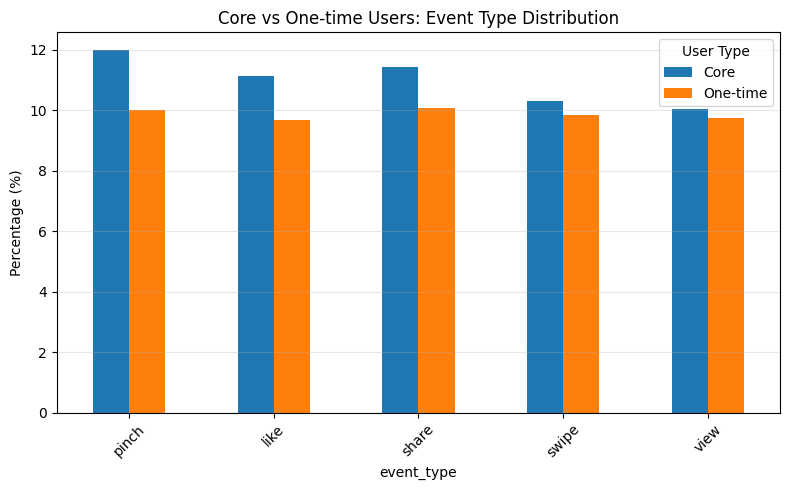

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

base = df.copy()
base = base[base['user_type'].isin(['Core','One-time'])].copy()
base['event_type'] = base['event_type'].astype(str)

# 1) 計數
event_dist = (
    base.groupby(['user_type','event_type'])
        .size().reset_index(name='count')
)

# 2) 轉百分比（用 transform，索引可對齊，不會報錯）
tot = event_dist.groupby('user_type')['count'].transform('sum')
event_dist['pct'] = event_dist['count'] / tot * 100

# 3) pivot
compare_table = (
    event_dist.pivot(index='event_type', columns='user_type', values='pct')
              .fillna(0)
)

# 4) 要畫的事件；若缺，就改畫差異最大的前5
wanted = ['pinch','like','share','swipe','view']
existing = [e for e in wanted if e in compare_table.index]
if not existing and {'Core','One-time'}.issubset(compare_table.columns):
    tmp = compare_table.copy()
    tmp['Diff'] = tmp['Core'] - tmp['One-time']
    existing = tmp['Diff'].abs().sort_values(ascending=False).head(5).index.tolist()
plot_data = compare_table.loc[existing, ['Core','One-time']]

# 5) 繪圖
ax = plot_data.plot(kind='bar', figsize=(8,5))
ax.set_title("Core vs One-time Users: Event Type Distribution")
ax.set_ylabel("Percentage (%)")
ax.set_xticklabels(existing, rotation=45)
ax.legend(title="User Type")
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [36]:
# 1. 每個 user 的活躍天數
active_days = df.groupby('user_id')['date'].nunique().reset_index()
active_days.rename(columns={'date':'active_days'}, inplace=True)

# 2. 定義分類規則
def label_user(d):
    if d <= 1:
        return 'One-time'
    elif d < 7:
        return 'Light'
    else:
        return 'Core'

# 3. 建立 user_days
user_days = active_days.copy()
user_days['user_type'] = user_days['active_days'].apply(label_user)

# 4. 計算分布
user_type_dist = user_days['user_type'].value_counts(normalize=True) * 100
print(user_type_dist.round(2))


user_type
One-time    60.63
Light       39.36
Core         0.01
Name: proportion, dtype: float64


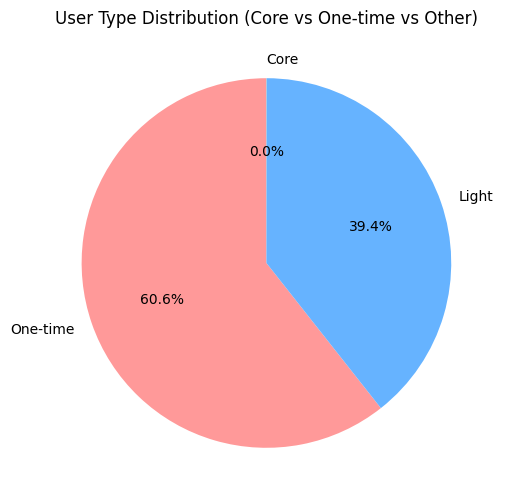

In [37]:
import matplotlib.pyplot as plt

# 計算用戶分布
user_type_dist = user_days['user_type'].value_counts()

# 畫圓餅圖
plt.figure(figsize=(6,6))
plt.pie(
    user_type_dist,
    labels=user_type_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']  # 一次性/其他/核心
)

plt.title("User Type Distribution (Core vs One-time vs Other)")
plt.show()


            Non-Subscribed (%)  Subscribed (%)  Diff (Subscribed - Non)
event_type                                                             
share                 9.863115       10.298473                     0.44
view                  9.803600        9.985507                     0.18
scroll                9.859010        9.972904                     0.11
pinch                 9.764607        9.827974                     0.06
pi5ch                 0.002052        0.000000                    -0.00
pNnch                 0.000000        0.002100                     0.00
pOnch                 0.002052        0.000000                    -0.00
pUsGYv                0.000000        0.002100                     0.00
pbnch                 0.002052        0.000000                    -0.00
phare                 0.000000        0.002100                     0.00
pi0ch                 0.000000        0.002100                     0.00
0fPTNN                0.000000        0.002100                  

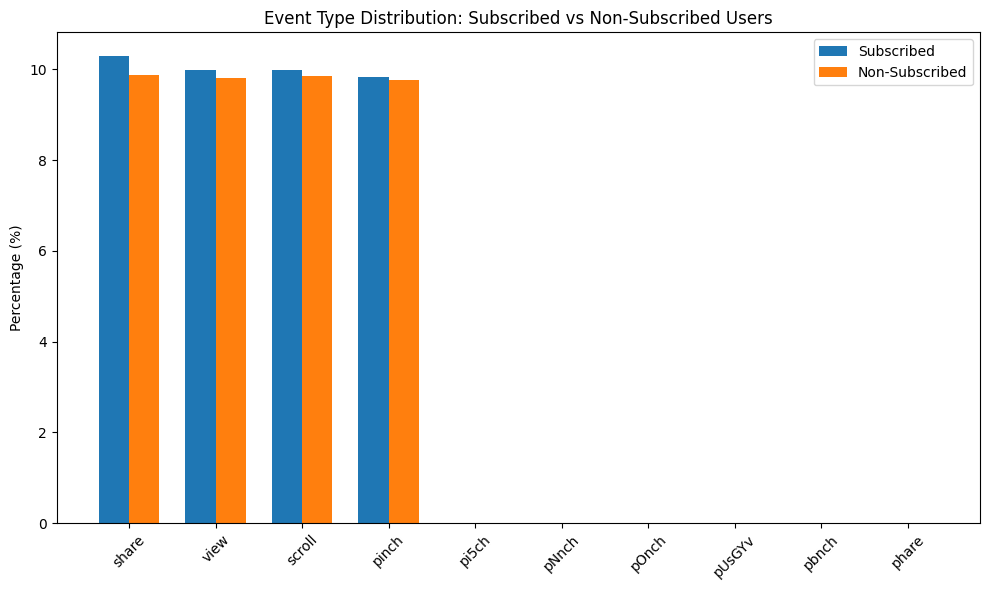

In [38]:
import matplotlib.pyplot as plt

# 事件分布比較 (訂閱 vs 非訂閱)
event_dist = (
    df.groupby(['is_subscribed','event_type'])
    .size()
    .reset_index(name='count')
)
event_dist['percent'] = event_dist.groupby('is_subscribed')['count'].transform(lambda x: x/x.sum()*100)

compare_event = event_dist.pivot(index='event_type', columns='is_subscribed', values='percent').fillna(0)
compare_event.columns = ['Non-Subscribed (%)','Subscribed (%)']
compare_event['Diff (Subscribed - Non)'] = (compare_event['Subscribed (%)'] - compare_event['Non-Subscribed (%)']).round(2)
compare_event = compare_event.sort_values('Diff (Subscribed - Non)', ascending=False)

# 輸出表格 (前20個差異最大的事件)
print(compare_event.head(20))

# 視覺化 (前10個事件)
top_events = compare_event.head(10)
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(top_events))

plt.bar(
    [i - bar_width/2 for i in index], 
    top_events['Subscribed (%)'], 
    bar_width, 
    label='Subscribed'
)

plt.bar(
    [i + bar_width/2 for i in index], 
    top_events['Non-Subscribed (%)'], 
    bar_width, 
    label='Non-Subscribed'
)

plt.xticks(index, top_events.index, rotation=45)
plt.ylabel("Percentage (%)")
plt.title("Event Type Distribution: Subscribed vs Non-Subscribed Users")
plt.legend()
plt.tight_layout()
plt.show()



📊 留存曲線（D0–D14 平均）
 is_subscribed_clean  Non-Subscribed  Subscribed
days_since_first                               
0                             1.000       1.000
1                             0.016       0.042
2                             0.018       0.040
3                             0.017       0.042
4                             0.017       0.040
5                             0.017       0.039
6                             0.016       0.041
7                             0.016       0.040
8                             0.016       0.079
9                             0.017       0.039
10                            0.016       0.041
11                            0.015       0.036
12                            0.018       0.039
13                            0.016       0.039
14                            0.016       0.040


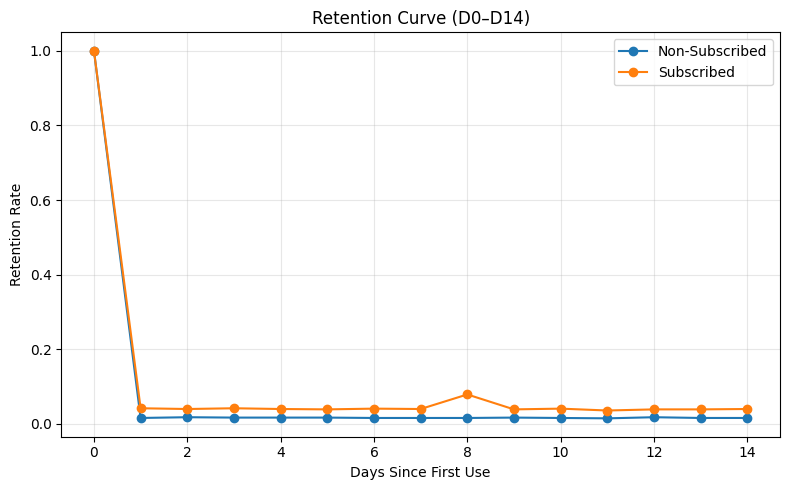

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Step 0: 用乾淨的訂閱標籤 ----------
df['is_subscribed_clean'] = df['is_subscribed'].astype(int)  # False→0, True→1

# ---------- Step 1: 準備資料 ----------
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date

# 每位 user 的 cohort_date（首次使用日）
cohort = (
    df.groupby('user_id', as_index=False)['date']
      .min()
      .rename(columns={'date':'cohort_date'})
)
user_sub = (
    df.groupby('user_id', as_index=False)['is_subscribed_clean']
      .max()
)
profile = cohort.merge(user_sub, on='user_id', how='left')

df_work = df[['user_id','date']].merge(profile, on='user_id', how='left')
df_work['days_since_first'] = (
    pd.to_datetime(df_work['date']) - pd.to_datetime(df_work['cohort_date'])
).dt.days

# ---------- Step 2: 留存率計算 ----------
ret_raw = (
    df_work.groupby(['is_subscribed_clean','cohort_date','days_since_first'], observed=False)['user_id']
           .nunique()
           .reset_index(name='users')
)
cohort_size = (
    ret_raw[ret_raw['days_since_first']==0]
      [['is_subscribed_clean','cohort_date','users']]
      .rename(columns={'users':'cohort_size'})
)
ret_rate = ret_raw.merge(cohort_size, on=['is_subscribed_clean','cohort_date'], how='left')
ret_rate['retention_rate'] = ret_rate['users'] / ret_rate['cohort_size']

# ---------- Step 3: D0–D14 平均留存曲線 ----------
ret_curve = (
    ret_rate[ret_rate['days_since_first']<=14]
      .groupby(['days_since_first','is_subscribed_clean'])['retention_rate']
      .mean()
      .unstack('is_subscribed_clean')
      .reindex(columns=[0,1])   # 確保有 0 & 1
      .rename(columns={0:'Non-Subscribed', 1:'Subscribed'})
      .round(3)
)

print("\n📊 留存曲線（D0–D14 平均）\n", ret_curve)

# ---------- Step 4: 畫圖 ----------
plt.figure(figsize=(8,5))
plt.plot(ret_curve.index, ret_curve['Non-Subscribed'], marker='o', label='Non-Subscribed')
plt.plot(ret_curve.index, ret_curve['Subscribed'], marker='o', label='Subscribed')
plt.xlabel("Days Since First Use")
plt.ylabel("Retention Rate")
plt.title("Retention Curve (D0–D14)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



📊 事件類型佔比差異（訂閱 vs 非訂閱）

            Non-Subscribed (%)  Subscribed (%)  Diff (Subscribed - Non)
event_type                                                             
share                    0.099           0.103                    0.004
view                     0.098           0.100                    0.002
pinch                    0.098           0.098                    0.001
scroll                   0.099           0.100                    0.001
0fPTNN                   0.000           0.000                    0.000
pOnch                    0.000           0.000                   -0.000
pUsGYv                   0.000           0.000                    0.000
pbnch                    0.000           0.000                   -0.000
phare                    0.000           0.000                    0.000
pi0ch                    0.000           0.000                    0.000
pi5ch                    0.000           0.000                   -0.000
pi8ch                    0.000          

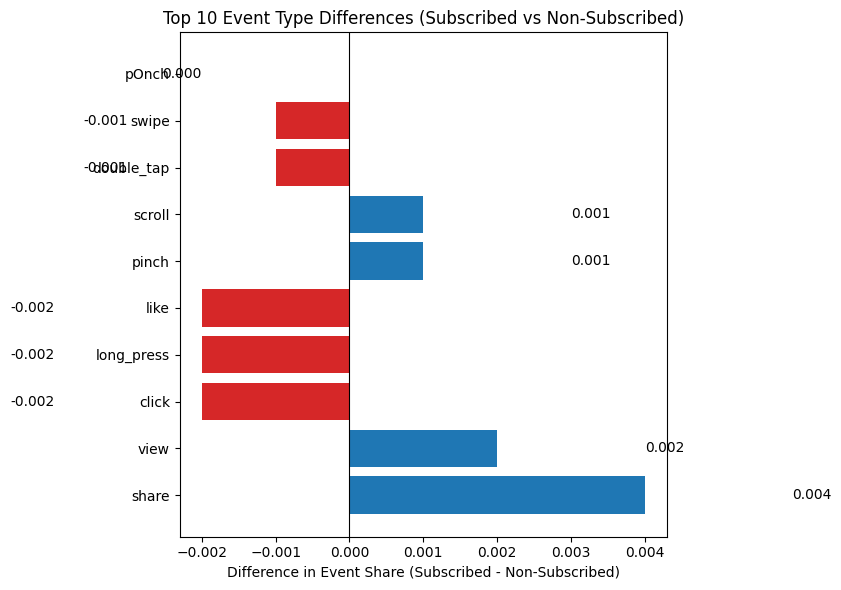

In [40]:
import pandas as pd

# 用乾淨的訂閱標籤
df['is_subscribed_clean'] = df['is_subscribed'].astype(int)

# 事件統計 (每個群組的事件數)
event_counts = (
    df.groupby(['is_subscribed_clean','event_type'])
      .size()
      .reset_index(name='count')
)

# 每個群組的總事件數（當分母）
group_totals = event_counts.groupby('is_subscribed_clean')['count'].sum()

# 算百分比
event_counts['percent'] = event_counts.apply(
    lambda r: r['count'] / group_totals.loc[r['is_subscribed_clean']], axis=1
)

# 展開成訂閱 vs 非訂閱對照表
pivot = event_counts.pivot(index='event_type', columns='is_subscribed_clean', values='percent').fillna(0)
pivot.columns = ['Non-Subscribed (%)','Subscribed (%)']

# 差異：訂閱 - 非訂閱
pivot['Diff (Subscribed - Non)'] = (pivot['Subscribed (%)'] - pivot['Non-Subscribed (%)']).round(4)

# 排序：按差異大小
pivot = pivot.round(3).sort_values('Diff (Subscribed - Non)', ascending=False)

print("\n📊 事件類型佔比差異（訂閱 vs 非訂閱）\n")
print(pivot.head(20))   # 看前 20 個差異最大的事件

# ---- 先跑前面事件差異表的程式碼，得到 pivot ----
# pivot = ...  (前面生成的 DataFrame)

# 取出差異絕對值最大的 Top10
top10 = pivot.reindex(pivot['Diff (Subscribed - Non)'].abs().sort_values(ascending=False).head(10).index)

# 繪圖
plt.figure(figsize=(10,6))
bars = plt.barh(top10.index, top10['Diff (Subscribed - Non)'], color=['#1f77b4' if x > 0 else '#d62728' for x in top10['Diff (Subscribed - Non)']])

# 輔助線
plt.axvline(0, color='black', linewidth=0.8)

# 標籤
plt.xlabel("Difference in Event Share (Subscribed - Non-Subscribed)")
plt.title("Top 10 Event Type Differences (Subscribed vs Non-Subscribed)")

# 在柱子上加數字標註
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.002 if width > 0 else -0.002),
             bar.get_y() + bar.get_height()/2,
             f"{width:.3f}",
             va='center',
             ha='left' if width > 0 else 'right')

plt.tight_layout()
plt.show()

In [41]:
df.groupby('device_os')['is_subscribed_clean'].mean().sort_values(ascending=False)


device_os
DQ08vE     1.0
LJAmmF     1.0
KOS        1.0
KLe38E     1.0
jnX1MJ     1.0
          ... 
PjQPwQ     0.0
Ondroid    0.0
OW8NQp     0.0
OOS        0.0
zxcpvz     0.0
Name: is_subscribed_clean, Length: 566, dtype: float64

In [42]:
device_stats = (
    df.groupby('device_os')
      .agg(User_Count=('user_id','nunique'),
           Subscription_Rate=('is_subscribed_clean','mean'))
      .reset_index()
      .sort_values('User_Count', ascending=False)
)
print(device_stats.head(20))


    device_os  User_Count  Subscription_Rate
153   Android       41869           0.494013
416       iOS       33513           0.494064
303   Unknown         300           0.476667
403       iO6           4           0.500000
158   Andromd           4           0.750000
438       iTS           3           0.333333
439       iUS           3           0.666667
145   Androhd           3           0.666667
244   Kndroid           3           0.333333
412       iOK           3           0.666667
387       i6S           3           0.333333
407       iOE           3           0.666667
456       iuS           3           0.333333
413       iOL           3           0.333333
80        AOS           3           1.000000
127   Andrcid           3           0.666667
446       ifS           3           0.333333
392       iDS           3           0.666667
396       iMS           2           0.000000
515       rOS           2           0.500000


In [43]:
import pandas as pd

def segmentation_stats(df, group_col, user_col='user_id', sub_col='is_subscribed', top_n=10):
    """
    分群分析：計算每個群體的用戶數與訂閱率
    
    df : DataFrame
    group_col : str, 分群欄位 (如 'device_os', 'location_country', 'app_language')
    user_col : str, 用戶ID欄位
    sub_col : str, 訂閱欄位 (需為 0/1 或 True/False)
    top_n : int, 輸出前 N 大群體
    
    return : DataFrame
    """
    # 確保訂閱欄位為 0/1
    sub = df[sub_col]
    if sub.dtype != 'int' and sub.dtype != 'float':
        sub = sub.astype(str).str.lower().isin(
            ['1','true','yes','y','paid','active','premium','subscribed']
        ).astype(int)

    # 分群統計
    stats = (
        df.groupby(group_col)
          .agg(User_Count=(user_col,'nunique'),
               Subscription_Rate=(sub_col,'mean'))
          .reset_index()
          .sort_values('User_Count', ascending=False)
    )

    # 四捨五入訂閱率
    stats['Subscription_Rate'] = stats['Subscription_Rate'].round(3)

    return stats.head(top_n)

device_stats = segmentation_stats(df, 'device_os')
print(device_stats)


    device_os  User_Count  Subscription_Rate
153   Android       41869              0.494
416       iOS       33513              0.494
303   Unknown         300              0.477
403       iO6           4              0.500
158   Andromd           4              0.750
438       iTS           3              0.333
439       iUS           3              0.667
145   Androhd           3              0.667
244   Kndroid           3              0.333
412       iOK           3              0.667


In [44]:
country_stats = segmentation_stats(df, 'location_country')
print(country_stats)

          location_country  User_Count  Subscription_Rate
345                  Korea         800              0.509
159                  Congo         789              0.506
662                Uruguay         436              0.521
316                Jamaica         425              0.533
538  Saint Kitts and Nevis         425              0.492
564                 Serbia         424              0.499
289               Honduras         422              0.470
456                   Niue         422              0.460
392               Maldives         421              0.548
420                Morocco         420              0.520


In [45]:
# 確保 is_subscribed 已經轉成 0/1
df['is_subscribed_num'] = (
    df['is_subscribed'].astype(str).str.lower()
      .isin(['1','true','yes','y','paid','active','premium','subscribed'])
).astype(int)

# 城市分群統計
city_stats = (
    df.groupby('location_city')
      .agg(User_Count=('user_id','nunique'),
           Subscription_Rate=('is_subscribed_num','mean'))
      .reset_index()
      .sort_values('User_Count', ascending=False)
)

# 四捨五入訂閱率
city_stats['Subscription_Rate'] = city_stats['Subscription_Rate'].round(3)

print("Top 10 Cities by User Count:")
print(city_stats.head(10))


Top 10 Cities by User Count:
       location_city  User_Count  Subscription_Rate
33491        Unknown         291              0.490
14191   Lake Michael          94              0.468
6780    East Michael          90              0.433
22718  North Michael          79              0.456
26374   Port Michael          79              0.519
19585    New Michael          73              0.452
36201   West Michael          73              0.452
30605    South James          72              0.528
16869   Michaelmouth          65              0.569
31793   South Robert          62              0.500


In [46]:
lang_stats = segmentation_stats(df, 'app_language')
print(lang_stats)

    app_language  User_Count  Subscription_Rate
401           fr       11440              0.493
571           zh       11280              0.498
434           ja       11273              0.491
502           ru       11178              0.490
289           ar       11152              0.498
377           es       11140              0.508
372           en       11105              0.492
331           de       11100              0.485
222      Unknown         313              0.486
362           eV           3              0.333


In [47]:
# 確保 is_subscribed 轉成 0/1
df['is_subscribed_num'] = (
    df['is_subscribed'].astype(str).str.lower()
      .isin(['1','true','yes','y','paid','active','premium','subscribed'])
).astype(int)

# 每個 user 在每種事件上的次數
user_event_counts = (
    df.groupby(['user_id','is_subscribed_num','event_type'])
      .size()
      .reset_index(name='event_count')
)

# 計算平均次數（依訂閱狀態 & 事件類型）
event_intensity = (
    user_event_counts.groupby(['is_subscribed_num','event_type'])['event_count']
      .mean()
      .reset_index()
      .pivot(index='event_type', columns='is_subscribed_num', values='event_count')
      .rename(columns={0:'Non-Subscribed Avg', 1:'Subscribed Avg'})
)

# 加上差異欄位
event_intensity['Diff (Subscribed - Non)'] = (
    event_intensity['Subscribed Avg'] - event_intensity['Non-Subscribed Avg']
)

print(event_intensity.sort_values('Diff (Subscribed - Non)', ascending=False).head(15))


is_subscribed_num  Non-Subscribed Avg  Subscribed Avg  Diff (Subscribed - Non)
event_type                                                                    
Unknown                      1.000000        1.006135                 0.006135
click                        1.025810        1.028609                 0.002798
pinch                        1.023886        1.026096                 0.002210
double_tap                   1.025427        1.027551                 0.002124
like                         1.027172        1.027821                 0.000649
8hare                        1.000000        1.000000                 0.000000
zooL                         1.000000        1.000000                 0.000000
doubleCtap                   1.000000        1.000000                 0.000000
lice                         1.000000        1.000000                 0.000000
sharx                        1.000000        1.000000                 0.000000
swUpe                        1.000000        1.00000

In [48]:
import pandas as pd
from collections import Counter

# === 0) 乾淨副本 + 基本清洗 ===
work = df.copy()
# 時間
work['timestamp'] = pd.to_datetime(work['timestamp'], errors='coerce')
# 事件型別
work['event_type'] = work['event_type'].astype(str)

# 訂閱 0/1 保底
if 'is_subscribed_num' not in work.columns:
    work['is_subscribed_num'] = (
        work['is_subscribed'].astype(str).str.lower()
        .isin(['1','true','yes','y','paid','active','premium','subscribed'])
    ).astype(int)

# === 1) 診斷資訊 ===
total_rows = len(work)
users_total = work['user_id'].nunique()
sub_users_arr = work.loc[work['is_subscribed_num']==1, 'user_id'].unique()
sub_users_n = len(sub_users_arr)
non_null_ts = work['timestamp'].notna().sum()
non_null_evt = work['event_type'].ne('nan').sum()

print(f"[DIAG] rows={total_rows}, users={users_total}, subscribed_users={sub_users_n}, "
      f"non_null_timestamp={non_null_ts}, non_null_event_type={non_null_evt}")

# === 2) 決定用哪一批用戶：優先訂閱用戶，沒有就退回全體 ===
if sub_users_n > 0:
    target_users = set(sub_users_arr)
    print("[INFO] Using subscribed users for path analysis.")
else:
    target_users = set(work['user_id'].unique())
    print("[WARN] No subscribed users found. Falling back to ALL users for path analysis.")

# === 3) 準備排序鍵：若 timestamp 幾乎都 NaT，就改用原始順序 ===
use_ts = non_null_ts > 0

if use_ts:
    work_sorted = work.sort_values(['user_id','timestamp'])
else:
    # 建一個 row_order 當次序
    work_sorted = work.reset_index().rename(columns={'index':'row_order'})
    work_sorted = work_sorted.sort_values(['user_id','row_order'])
    print("[WARN] All/Most timestamps are NaT. Using row order as sequence proxy.")

# === 4) 產生每位用戶最後 N 個事件（N 可調） ===
N = 5
paths = []
checked_users = 0

for uid, g in work_sorted[work_sorted['user_id'].isin(target_users)].groupby('user_id', sort=False):
    checked_users += 1
    seq = g['event_type'].tail(N).dropna().tolist()
    if len(seq) > 0:
        paths.append(tuple(seq))

print(f"[DIAG] users_considered={checked_users}, paths_collected={len(paths)}")

# === 5) 輸出結果或說明原因 ===
if len(paths) == 0:
    print("⚠️ 沒有收集到任何事件路徑。可能原因：")
    if sub_users_n == 0:
        print(" - 沒有訂閱用戶；已經嘗試改用全體用戶仍無資料。")
    if non_null_evt == 0:
        print(" - event_type 皆為空或非常態，請檢查來源資料。")
    if total_rows == 0:
        print(" - DataFrame 為空。")
    if non_null_ts == 0:
        print(" - timestamp 全為 NaT；已改用 row 順序仍未取得序列（每位用戶可能事件數過少）。")
else:
    out = pd.DataFrame(Counter(paths).most_common(10), columns=['Event_Path','Count'])
    print("Top 10 最常見的最後 N=5 事件路徑：")
    print(out)


[DIAG] rows=96336, users=61715, subscribed_users=37820, non_null_timestamp=96336, non_null_event_type=96336
[INFO] Using subscribed users for path analysis.
[DIAG] users_considered=37820, paths_collected=37820
Top 10 最常見的最後 N=5 事件路徑：
      Event_Path  Count
0       (share,)   1894
1       (pinch,)   1855
2        (zoom,)   1844
3      (scroll,)   1832
4  (long_press,)   1820
5        (view,)   1820
6       (click,)   1809
7       (swipe,)   1803
8  (double_tap,)   1796
9        (like,)   1727


In [49]:
import pandas as pd
from collections import Counter

work = df.copy()
work['timestamp'] = pd.to_datetime(work['timestamp'], errors='coerce')
if 'is_subscribed_num' not in work.columns:
    work['is_subscribed_num'] = work['is_subscribed'].astype(str).str.lower().isin(
        ['1','true','yes','y','paid','active','premium','subscribed']
    ).astype(int)

N = 2  # 路徑長度
sub = work[work['is_subscribed_num']==1].copy()
users_geN = sub.groupby('user_id').size().loc[lambda s: s>=N].index

paths = []
for uid, g in sub[sub['user_id'].isin(users_geN)].sort_values(['user_id','timestamp']).groupby('user_id'):
    paths.append(tuple(g['event_type'].tail(N).astype(str)))

top_paths = Counter(paths).most_common(50)
print(pd.DataFrame(top_paths, columns=['Event_Path','Count']))


                  Event_Path  Count
0             (scroll, view)    105
1             (click, swipe)    102
2             (click, share)    102
3        (long_press, pinch)    100
4             (scroll, zoom)    100
5             (share, click)     99
6         (like, long_press)     97
7              (view, share)     95
8        (click, double_tap)     94
9             (swipe, share)     94
10           (scroll, share)     93
11        (like, double_tap)     93
12        (long_press, view)     92
13      (long_press, scroll)     92
14            (view, scroll)     92
15             (pinch, view)     91
16            (click, click)     89
17           (share, scroll)     89
18            (swipe, click)     89
19             (like, swipe)     89
20             (swipe, view)     89
21       (share, double_tap)     88
22              (view, view)     88
23           (click, scroll)     88
24             (share, like)     86
25              (zoom, like)     85
26           (pinch, scroll)

In [50]:
import pandas as pd
from scipy.stats import chisquare

# 模擬你的 Top 10 數據
counts = [105, 102, 102, 100, 100, 99, 97, 95, 94, 94]

# 卡方檢定：比較觀察值 vs 均勻分布期望值
chi2, p_value = chisquare(counts)

print("Chi-square =", chi2)
print("p-value =", p_value)


Chi-square = 1.271255060728745
p-value = 0.9985148231456218


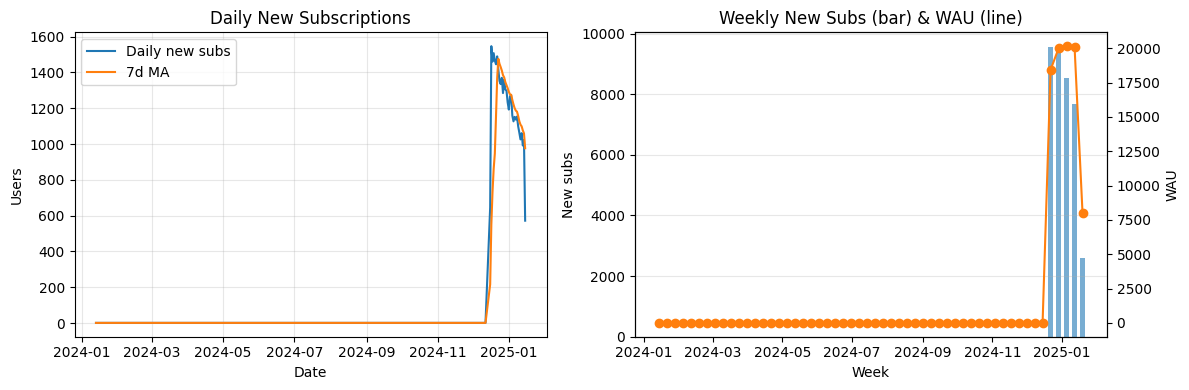

                     Events   DAU  NewSubs  DailySubRate
date                                                    
2025-01-06 00:00:00     0.0  3207     1152         0.359
2025-01-07 00:00:00     0.0  3123     1137         0.364
2025-01-08 00:00:00     0.0  3162     1154         0.365
2025-01-09 00:00:00     0.0  3161     1100         0.348
2025-01-10 00:00:00     0.0  3185     1064         0.334
2025-01-11 00:00:00     0.0  3134     1026         0.327
2025-01-12 00:00:00     0.0  3156     1061         0.336
2025-01-13 00:00:00     0.0  3167      992         0.313
2025-01-14 00:00:00     0.0  3170     1022         0.322
2025-01-15 00:00:00     0.0  1871      572         0.306


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 安全副本，不污染 df =====
work = df.copy()
work['timestamp'] = pd.to_datetime(work['timestamp'], errors='coerce')
work['date'] = work['timestamp'].dt.date

# ---- 訂閱旗標清洗成 bool（保底）----
sub_true_set = {'1','true','yes','y','paid','active','premium','subscribed'}
work['is_subscribed_bool'] = work['is_subscribed'].astype(str).str.lower().isin(sub_true_set)

# ---- 活躍度（你已有，但這裡一起算以便對齊）----
DAU = work.groupby('date')['user_id'].nunique().rename('DAU')
events_daily = work.groupby('date').size().rename('Events')

# ---- 新訂閱（以「每位用戶第一次出現 True 的日期」為訂閱日）----
first_sub_date = (
    work[work['is_subscribed_bool']]
      .groupby('user_id')['date'].min()
)
new_subs_daily = first_sub_date.value_counts().sort_index().rename('NewSubsDaily')

# 轉成 DatetimeIndex 以便重採樣
new_subs_daily.index = pd.to_datetime(new_subs_daily.index)
DAU.index = pd.to_datetime(DAU.index)

# ---- 每週聚合 ----
new_subs_weekly = new_subs_daily.resample('W-SUN').sum().rename('NewSubsWeekly')
WAU = (work.set_index(pd.to_datetime(work['date']))
            .groupby(pd.Grouper(freq='W-SUN'))['user_id']
            .nunique()
            .rename('WAU'))

# ---- 每日訂閱率（新訂閱 / DAU）----
sub_rate_daily = (new_subs_daily / DAU).fillna(0).rename('DailySubRate')

# ===== 視覺化 =====
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# 左：每日新訂閱 + 7日均線
axes[0].plot(new_subs_daily.index, new_subs_daily.values, label='Daily new subs')
axes[0].plot(new_subs_daily.index, new_subs_daily.rolling(7, min_periods=1).mean(),
             label='7d MA')
axes[0].set_title('Daily New Subscriptions')
axes[0].set_xlabel('Date'); axes[0].set_ylabel('Users')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 右：每週新訂閱（柱） + WAU（線）
axes[1].bar(new_subs_weekly.index, new_subs_weekly.values, width=5, alpha=0.6, label='Weekly new subs')
ax2 = axes[1].twinx()
ax2.plot(WAU.index, WAU.values, marker='o', label='WAU', color='C1')
axes[1].set_title('Weekly New Subs (bar) & WAU (line)')
axes[1].set_xlabel('Week'); axes[1].set_ylabel('New subs')
ax2.set_ylabel('WAU')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# （可選）輸出一眼可用的摘要
summary = pd.DataFrame({
    'Events': events_daily,
    'DAU': DAU,
    'NewSubs': new_subs_daily,
    'DailySubRate': sub_rate_daily
}).fillna(0)
print(summary.tail(10).round(3))


In [52]:
# 建立 mapping
event_corrections = {
    "Ewipe": "swipe",
    "liwe": "like",
    "shyre": "share"
}

# 替換 event_type
df['event_type'] = df['event_type'].replace(event_corrections)


In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. 事件出現表 (每人每事件是否用過)
event_seen = (
    df.groupby(['user_id','event_type']).size().unstack(fill_value=0) > 0
).astype(int)

# 2. 加入訂閱標籤
event_seen['is_subscribed'] = (
    df.groupby('user_id')['is_subscribed']
      .first().astype(str).str.lower()
      .isin({'1','true','yes','y','paid','active','premium','subscribed'})
).astype(int)

results = []

# 3. 逐事件檢驗
for evt in event_seen.columns.drop('is_subscribed'):
    # 列聯表
    contingency = pd.crosstab(event_seen[evt], event_seen['is_subscribed'])
    if contingency.shape == (2,2):
        chi2, p, dof, expected = chi2_contingency(contingency)
        rate_with = contingency.loc[1,1] / contingency.loc[1].sum()  # 有用過的訂閱率
        rate_without = contingency.loc[0,1] / contingency.loc[0].sum()  # 沒用過的訂閱率
        diff = rate_with - rate_without
        results.append([evt, rate_with, rate_without, diff, chi2, p])

# 4. 整理結果表
results_df = pd.DataFrame(
    results, columns=['event_type','SubRate_Used','SubRate_NotUsed',
                      'Diff','Chi2','p_value']
).sort_values('p_value')

print("📊 事件是否出現過 vs 訂閱率 (卡方檢定)")
print(results_df.head(10).round(4))


📊 事件是否出現過 vs 訂閱率 (卡方檢定)
     event_type  SubRate_Used  SubRate_NotUsed    Diff    Chi2  p_value
352        like        0.4842           0.4984 -0.0142  6.0930   0.0136
255       click        0.4898           0.4975 -0.0078  1.8579   0.1729
613        zoom        0.5027           0.4953  0.0074  1.6474   0.1993
282  double_tap        0.4919           0.4971 -0.0052  0.8240   0.3640
477      scroll        0.4932           0.4969 -0.0037  0.4178   0.5180
526       swipe        0.4934           0.4969 -0.0035  0.3614   0.5477
498       share        0.4981           0.4961  0.0020  0.1160   0.7334
379  long_press        0.4976           0.4962  0.0014  0.0560   0.8129
427       pinch        0.4953           0.4965 -0.0012  0.0394   0.8426
189     Unknown        0.5030           0.4963  0.0067  0.0352   0.8511


  diversity_bin  User_Count  Subscription_Rate
0           1-2       56009           0.497224
1           3-5        5695           0.487972
2           6-8          10           0.500000
3            9+           1           0.000000


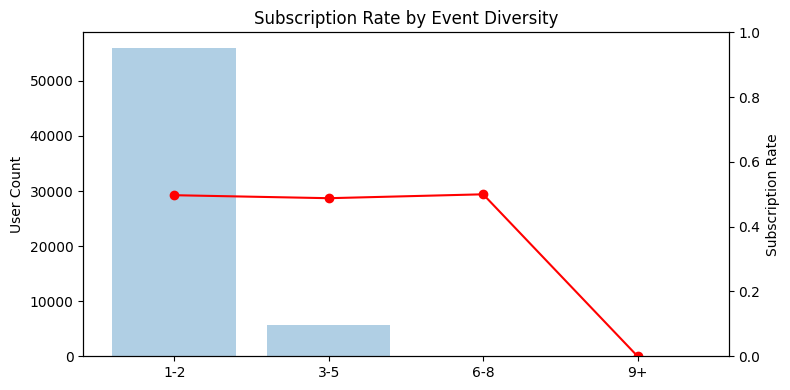

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 每個用戶用過的事件種類數
user_event_diversity = (
    df.groupby('user_id')['event_type'].nunique().reset_index(name='event_types_count')
)

# 2. 加上訂閱標籤
user_event_diversity = user_event_diversity.merge(
    df.groupby('user_id')['is_subscribed'].first().reset_index(),
    on='user_id', how='left'
)

# 3. 分組區間
bins = [0, 2, 5, 8, user_event_diversity['event_types_count'].max()]
labels = ['1-2', '3-5', '6-8', '9+']
user_event_diversity['diversity_bin'] = pd.cut(
    user_event_diversity['event_types_count'], bins=bins, labels=labels, include_lowest=True
)

# 4. 訂閱率統計
diversity_stats = (
    user_event_diversity.groupby('diversity_bin', observed=False)['is_subscribed']
    .agg(User_Count='count', Subscription_Rate='mean')
    .reset_index()
)


print(diversity_stats)

# 5. 視覺化
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.bar(diversity_stats['diversity_bin'], diversity_stats['User_Count'],
        alpha=0.35, label="User Count")
ax1.set_ylabel("User Count")

ax2 = ax1.twinx()
ax2.plot(diversity_stats['diversity_bin'], diversity_stats['Subscription_Rate'],
         marker='o', color='red', label="Subscription Rate")
ax2.set_ylabel("Subscription Rate")
ax2.set_ylim(0,1)

plt.title("Subscription Rate by Event Diversity")
plt.tight_layout()
plt.show()


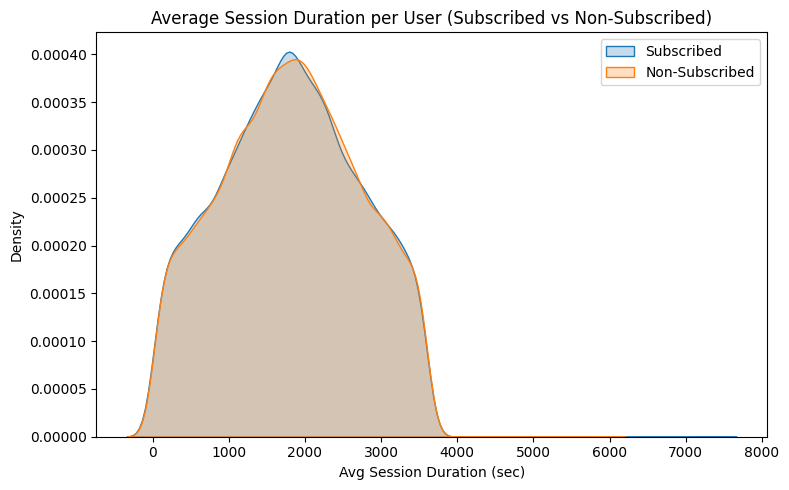

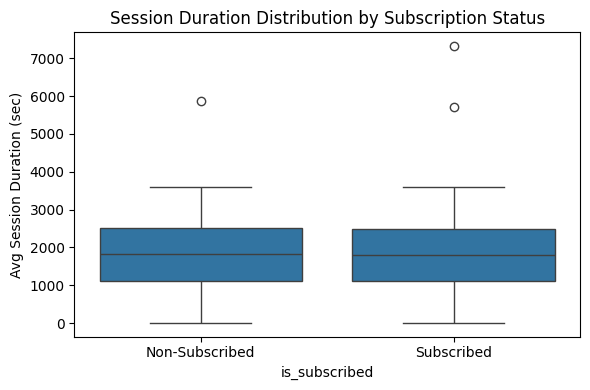

T-test p-value: 0.5010
Mann-Whitney p-value: 0.4738


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 1. 每位用戶的平均 session 時長
user_sessions = (
    df.groupby('user_id')['session_duration_sec']
      .mean()
      .reset_index(name='avg_session_sec')
)

# 2. 加上訂閱標籤
user_sessions = user_sessions.merge(
    df.groupby('user_id')['is_subscribed'].first().reset_index(),
    on='user_id', how='left'
)

# 3. 分組數據
subscribed = user_sessions[user_sessions['is_subscribed'] == True]['avg_session_sec']
nonsub = user_sessions[user_sessions['is_subscribed'] == False]['avg_session_sec']

# 4. 視覺化 - 分布比較
plt.figure(figsize=(8,5))
sns.kdeplot(subscribed, label="Subscribed", fill=True)
sns.kdeplot(nonsub, label="Non-Subscribed", fill=True)
plt.title("Average Session Duration per User (Subscribed vs Non-Subscribed)")
plt.xlabel("Avg Session Duration (sec)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# 5. 箱型圖
plt.figure(figsize=(6,4))
sns.boxplot(x='is_subscribed', y='avg_session_sec', data=user_sessions)
plt.title("Session Duration Distribution by Subscription Status")
plt.xticks([0,1], ['Non-Subscribed','Subscribed'])
plt.ylabel("Avg Session Duration (sec)")
plt.tight_layout()
plt.show()

# 6. 統計檢驗
t_stat, p_val_t = ttest_ind(subscribed, nonsub, equal_var=False)
u_stat, p_val_u = mannwhitneyu(subscribed, nonsub)

print(f"T-test p-value: {p_val_t:.4f}")
print(f"Mann-Whitney p-value: {p_val_u:.4f}")
